In [1]:
!pip install ktrain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 58.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 62.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.0/266.0 KB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 103.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 52.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 KB 36.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import ktrain
from ktrain import text

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data_train = pd.read_csv('/content/drive/MyDrive/ColabData/twitter_2018_rahip_brunson/train.csv', encoding='latin-1')

In [5]:
data_train.head()

,Unnamed: 0,tweet,Subjectivity,Polarity,Analysis
0,0,"gold settles higher recent downdraft, inflatio...",0.283333,0.116667,Positive
1,1,gloves wedding lace ivory bridalgown weddingdr...,0.600000,0.500000,Positive
2,2,boston happening tomorrow _music!! tickets now...,0.602273,-0.306818,Negative
3,3,ç¬¬ä¸ååéå°éåèä¾¡æ ¼(1kgç¨è¾¼) 8...,0.000000,0.000000,Neutral
4,4,"gold gains 1 percent dollar retreat, short-cov...",0.000000,0.000000,Neutral


In [6]:
data_test = pd.read_csv('/content/drive/MyDrive/ColabData/twitter_2018_rahip_brunson/test.csv', encoding='latin-1')

In [7]:
data_test.head()

,Unnamed: 0,tweet,Subjectivity,Polarity,Analysis
0,40000,â awax - finacial blockchain ð°ð°ð° inn...,0.666667,0.066667,Positive
1,40001,juuusssttt hair center (say like bob uecker ma...,0.255556,-0.068056,Negative
2,40002,"los videojuegos son vicio caro, asÃ­que os tra...",0.750000,0.375000,Positive
3,40003,cryptocurrency price analysis bitsend bsd : â¬...,0.677273,-0.331818,Negative
4,40004,god trust pay cash! deadpresidents cash coin,0.000000,0.000000,Neutral


In [8]:
(X_train, y_train), (X_test, y_test), preprocess = text.texts_from_df(train_df = data_train,
                 text_column = 'tweet',
                 label_columns = 'Analysis',
                 val_df = data_test,
                 maxlen = 400,
                 ngram_range=2,
                 preprocess_mode = 'bert')

['Negative', 'Neutral', 'Positive']
   Negative  Neutral  Positive
0       0.0      0.0       1.0
1       0.0      0.0       1.0
2       1.0      0.0       0.0
3       0.0      1.0       0.0
4       0.0      1.0       0.0
['Negative', 'Neutral', 'Positive']
   Negative  Neutral  Positive
0       0.0      0.0       1.0
1       1.0      0.0       0.0
2       0.0      0.0       1.0
3       1.0      0.0       0.0
4       0.0      1.0       0.0
downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


In [9]:
X_train[0].shape

(40000, 400)

In [10]:
model = text.text_classifier(name='bert',
                            train_data = (X_train, y_train),
                            preproc = preprocess)

Is Multi-Label? False
maxlen is 400
done.


In [11]:
# Get learning rate.
learner = ktrain.get_learner(model = model,
                            train_data = (X_train, y_train),
                            val_data = (X_test, y_test),
                            batch_size = 6)

In [12]:
# get optimal learning rate.
#learner.lr_find(start_lr=1e-07, max_epochs=10)
#learner.lr_plot()

In [13]:
history = learner.fit_onecycle(lr = 2e-5, epochs = 3) #2e-5, 1e-4




begin training using onecycle policy with max lr of 2e-05...
Epoch 1/3
6667/6667 [==============================] - 663s 96ms/step - loss: 0.1720 - accuracy: 0.9392 - val_loss: 0.6591 - val_accuracy: 0.8243
Epoch 2/3
6667/6667 [==============================] - 636s 95ms/step - loss: 0.0256 - accuracy: 0.9936 - val_loss: 0.4802 - val_accuracy: 0.8477
Epoch 3/3
6667/6667 [==============================] - 637s 96ms/step - loss: 0.0033 - accuracy: 0.9994 - val_loss: 0.8198 - val_accuracy: 0.8429


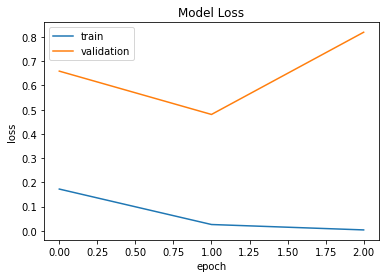

In [14]:
learner.plot('loss')

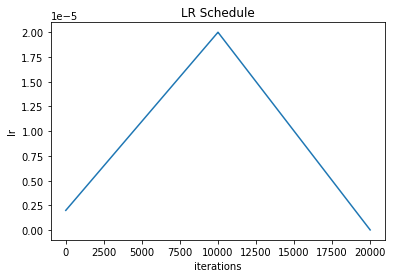

In [15]:
learner.plot('lr')

In [16]:
learner.validate()

175/175 [==============================] - 23s 114ms/step
              precision    recall  f1-score   support

           0       0.60      0.78      0.68       736
           1       0.90      0.80      0.85      2650
           2       0.89      0.91      0.90      2214

    accuracy                           0.84      5600
   macro avg       0.80      0.83      0.81      5600
weighted avg       0.85      0.84      0.85      5600



array([[ 573,  117,   46],
       [ 303, 2133,  214],
       [  79,  121, 2014]])